Los objetivos son: encontrar posibles relaciones entre las variables que conforman el dataset, extraer algunas conclusiones que ayuden a analizar los factores que afectan al precio de los alquileres, y estudiar distintos estadísticos que nos permitan tener un mayor conocimiento de cómo se comporta el sector del alquiler turístico privado en el estado de Nueva York.

El dataset recoge los datos de Airbnb relativos al tramo 2008 - 2019. Fuente: Kaggle

Vamos a tratar de quedar con un dataset, que contengan los valores promedios, que sean los mas representativos de la mayoria de los casos, tanto para los precios, como para la cantidad de noches.
Lo que se nos pide que investiguemos es lo siguiente:


Paso 2:

Use un cuaderno para encontrar patrones e información valiosa tanto como pueda. Realice gráficos que nos ayuden a comprender los patrones encontrados, obtenga algunas estadísticas, cree nuevas variables si es necesario, etc.

¿Qué podemos aprender sobre diferentes anfitriones y áreas?
¿Qué hosts son los más ocupados y por qué?
¿Hay alguna diferencia notable de tráfico entre las diferentes áreas y cuál podría ser la razón?

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium

La primera parte del análisis va a consistir en tener una visión global respecto de cómo están distribuidos los datos con los que vamos a trabajar y, en caso de que proceda, corregir y limpiar aquellas variables que, por contener valores erróneos o nulos, así lo necesiten.

Importamos el archivo y los convertimos a un dataframe de Pandas y observamos el número de datos que contiene cada una de las columnas

In [3]:
df_NY = pd.read_csv('../data/raw/AB_NYC_2019.csv')


df_NY.count()

id                                48895
name                              48879
host_id                           48895
host_name                         48874
neighbourhood_group               48895
neighbourhood                     48895
latitude                          48895
longitude                         48895
room_type                         48895
price                             48895
minimum_nights                    48895
number_of_reviews                 48895
last_review                       38843
reviews_per_month                 38843
calculated_host_listings_count    48895
availability_365                  48895
dtype: int64

Obtenemos un pequeño resumen de los principales estadísticos del dataset que nos permita identificar posibles outliers o valores que, por estar demasiado alejados del global, pueden interferir de forma negativa en el modelo y que éste no refleje una imagen fiel de la realidad, o tratar de concentrarnos en los valores mas cerca de la media de los valores.

In [4]:
df_NY.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


En el caso de la columna "minimum_nights", tenemos un valor de 1250 noches, sale un poco de la filosofia de este tipo de aplicaciones. Esta idea se refuerza aún más con la información que aporta el cuartil 3, en el cual podemos ver que en un 75% de los casos el valor para esta variable es 5 o inferior.

Otro de los valores que pueden afectar de forma negativa es el que se refiere al precio máximo. Si tenemos en cuenta que la media se sitúa en 152 dólares, y que el 75% de los precios pisos tienen, como máximo, un precio de 175 dólares, lo más adecuado es prescindir del piso que tiene como precio máximo 10.000 dólares.

El número de registros que tienen un precio superior a 2.000 dólares es de 86 . Es decir, un 0,18% del total del Dataset. Se tratan, por tanto, de muy pocos registros con unos valores que difieren mucho del resto, y que debemos evitar si queremos conseguir un modelo que se adecúe a la realidad lo máximo posible.

In [5]:
df_NY[df_NY["price"]>2000].count()

id                                86
name                              86
host_id                           86
host_name                         86
neighbourhood_group               86
neighbourhood                     86
latitude                          86
longitude                         86
room_type                         86
price                             86
minimum_nights                    86
number_of_reviews                 86
last_review                       35
reviews_per_month                 35
calculated_host_listings_count    86
availability_365                  86
dtype: int64

Lo mismo ocurre con el número de registros que tienen como valor una cifra superior a 100 noches como límite mínimo de estancia, son 174 valores que son un 0.36% del total del dataset

In [6]:
df_NY[df_NY["minimum_nights"]>100].count()

id                                174
name                              173
host_id                           174
host_name                         174
neighbourhood_group               174
neighbourhood                     174
latitude                          174
longitude                         174
room_type                         174
price                             174
minimum_nights                    174
number_of_reviews                 174
last_review                        89
reviews_per_month                  89
calculated_host_listings_count    174
availability_365                  174
dtype: int64

In [7]:
# Vamos a investigar la cantidad que tienen como requisito mas de 1000 noches
df_NY[df_NY["minimum_nights"]>1000].count()

id                                1
name                              1
host_id                           1
host_name                         1
neighbourhood_group               1
neighbourhood                     1
latitude                          1
longitude                         1
room_type                         1
price                             1
minimum_nights                    1
number_of_reviews                 1
last_review                       1
reviews_per_month                 1
calculated_host_listings_count    1
availability_365                  1
dtype: int64

In [8]:
df_NY[df_NY['minimum_nights']> 1000]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
5767,4204302,Prime W. Village location 1 bdrm,17550546,Genevieve,Manhattan,Greenwich Village,40.73293,-73.99782,Entire home/apt,180,1250,2,2014-11-09,0.03,1,365


Vemos que es un solo apartamento que exige mas de 1000 noches como exigencia para alquilar, no lo puedo asegurar, pero tal vez se trate de un dato mal ingresado, por lo que tiene mucha diferencia con los demas.

Ahora voy a investigar los apartamentos mas caros en NY.

In [9]:
df_NY[df_NY['price']> 9000]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
6530,4737930,Spanish Harlem Apt,1235070,Olson,Manhattan,East Harlem,40.79264,-73.93898,Entire home/apt,9999,5,1,2015-01-02,0.02,1,0
9151,7003697,Furnished room in Astoria apartment,20582832,Kathrine,Queens,Astoria,40.76810,-73.91651,Private room,10000,100,2,2016-02-13,0.04,1,0
12342,9528920,"Quiet, Clean, Lit @ LES & Chinatown",3906464,Amy,Manhattan,Lower East Side,40.71355,-73.98507,Private room,9999,99,6,2016-01-01,0.14,1,83
17692,13894339,Luxury 1 bedroom apt. -stunning Manhattan views,5143901,Erin,Brooklyn,Greenpoint,40.73260,-73.95739,Entire home/apt,10000,5,5,2017-07-27,0.16,1,0
29238,22436899,1-BR Lincoln Center,72390391,Jelena,Manhattan,Upper West Side,40.77213,-73.98665,Entire home/apt,10000,30,0,NaN,NaN,1,83
40433,31340283,2br - The Heart of NYC: Manhattans Lower East ...,4382127,Matt,Manhattan,Lower East Side,40.71980,-73.98566,Entire home/apt,9999,30,0,NaN,NaN,1,365


Vemos que hay solo 5 apartamentos con precios mayores a 9000 dolares por noche.
Vamos a eliminar estos valores extremos que los definimos como outliers, valores fuera del rango, ya que estan con mucha diferencia respecto a la media del precio de estos apartamentos.

In [10]:
# eliminamos los valores cuyo valor de precio sea mayor que 2000
df_2_NY=df_NY[df_NY['price']<=2000]
df_2_NY.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48809 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48809 non-null  int64  
 1   name                            48793 non-null  object 
 2   host_id                         48809 non-null  int64  
 3   host_name                       48788 non-null  object 
 4   neighbourhood_group             48809 non-null  object 
 5   neighbourhood                   48809 non-null  object 
 6   latitude                        48809 non-null  float64
 7   longitude                       48809 non-null  float64
 8   room_type                       48809 non-null  object 
 9   price                           48809 non-null  int64  
 10  minimum_nights                  48809 non-null  int64  
 11  number_of_reviews               48809 non-null  int64  
 12  last_review                     

In [11]:
# eliminamos los valores donde el minimo de noches sean mayores que 100 noches
df_3_NY=df_2_NY[df_2_NY["minimum_nights"]<=100]
df_3_NY.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48639 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48639 non-null  int64  
 1   name                            48624 non-null  object 
 2   host_id                         48639 non-null  int64  
 3   host_name                       48618 non-null  object 
 4   neighbourhood_group             48639 non-null  object 
 5   neighbourhood                   48639 non-null  object 
 6   latitude                        48639 non-null  float64
 7   longitude                       48639 non-null  float64
 8   room_type                       48639 non-null  object 
 9   price                           48639 non-null  int64  
 10  minimum_nights                  48639 non-null  int64  
 11  number_of_reviews               48639 non-null  int64  
 12  last_review                     

Vamos a eliminar tambien las columnas id y host name que de acuerdo a este analisis de precios no nos aportan informacion relevante.

In [12]:
# Drop ["id", "host_name"] 
df_3_NY.drop(["id", "host_name"], axis="columns", inplace=True)
df_3_NY.head()

/tmp/ipykernel_1768/3059938749.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3_NY.drop(["id", "host_name"], axis="columns", inplace=True)


,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


Tras este análisis, procedemos a eliminar los outliers y comprobamos que los estadísticos ahora tienen mayor congruencia

In [13]:
df_3_NY.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.863900e+04,48639.000000,48639.000000,48639.00000,48639.000000,48639.000000,38719.000000,48639.000000,48639.000000
mean,6.766524e+07,40.728907,-73.952067,145.35490,6.139785,23.352906,1.375943,7.153334,112.273937
std,7.862377e+07,0.054546,0.046190,139.22017,9.995781,44.601308,1.681605,32.999383,131.372118
min,2.438000e+03,40.499790,-74.244420,0.00000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,7.848642e+06,40.690030,-73.982995,69.00000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,3.084949e+07,40.722990,-73.955620,105.00000,2.000000,5.000000,0.720000,1.000000,44.000000
75%,1.074344e+08,40.763110,-73.936115,175.00000,5.000000,24.000000,2.020000,2.000000,225.000000
max,2.743213e+08,40.913060,-73.712990,2000.00000,100.000000,629.000000,58.500000,327.000000,365.000000


Vamos ahora con esta limpieza ver las graficas de cada una de las columnas que quedaron

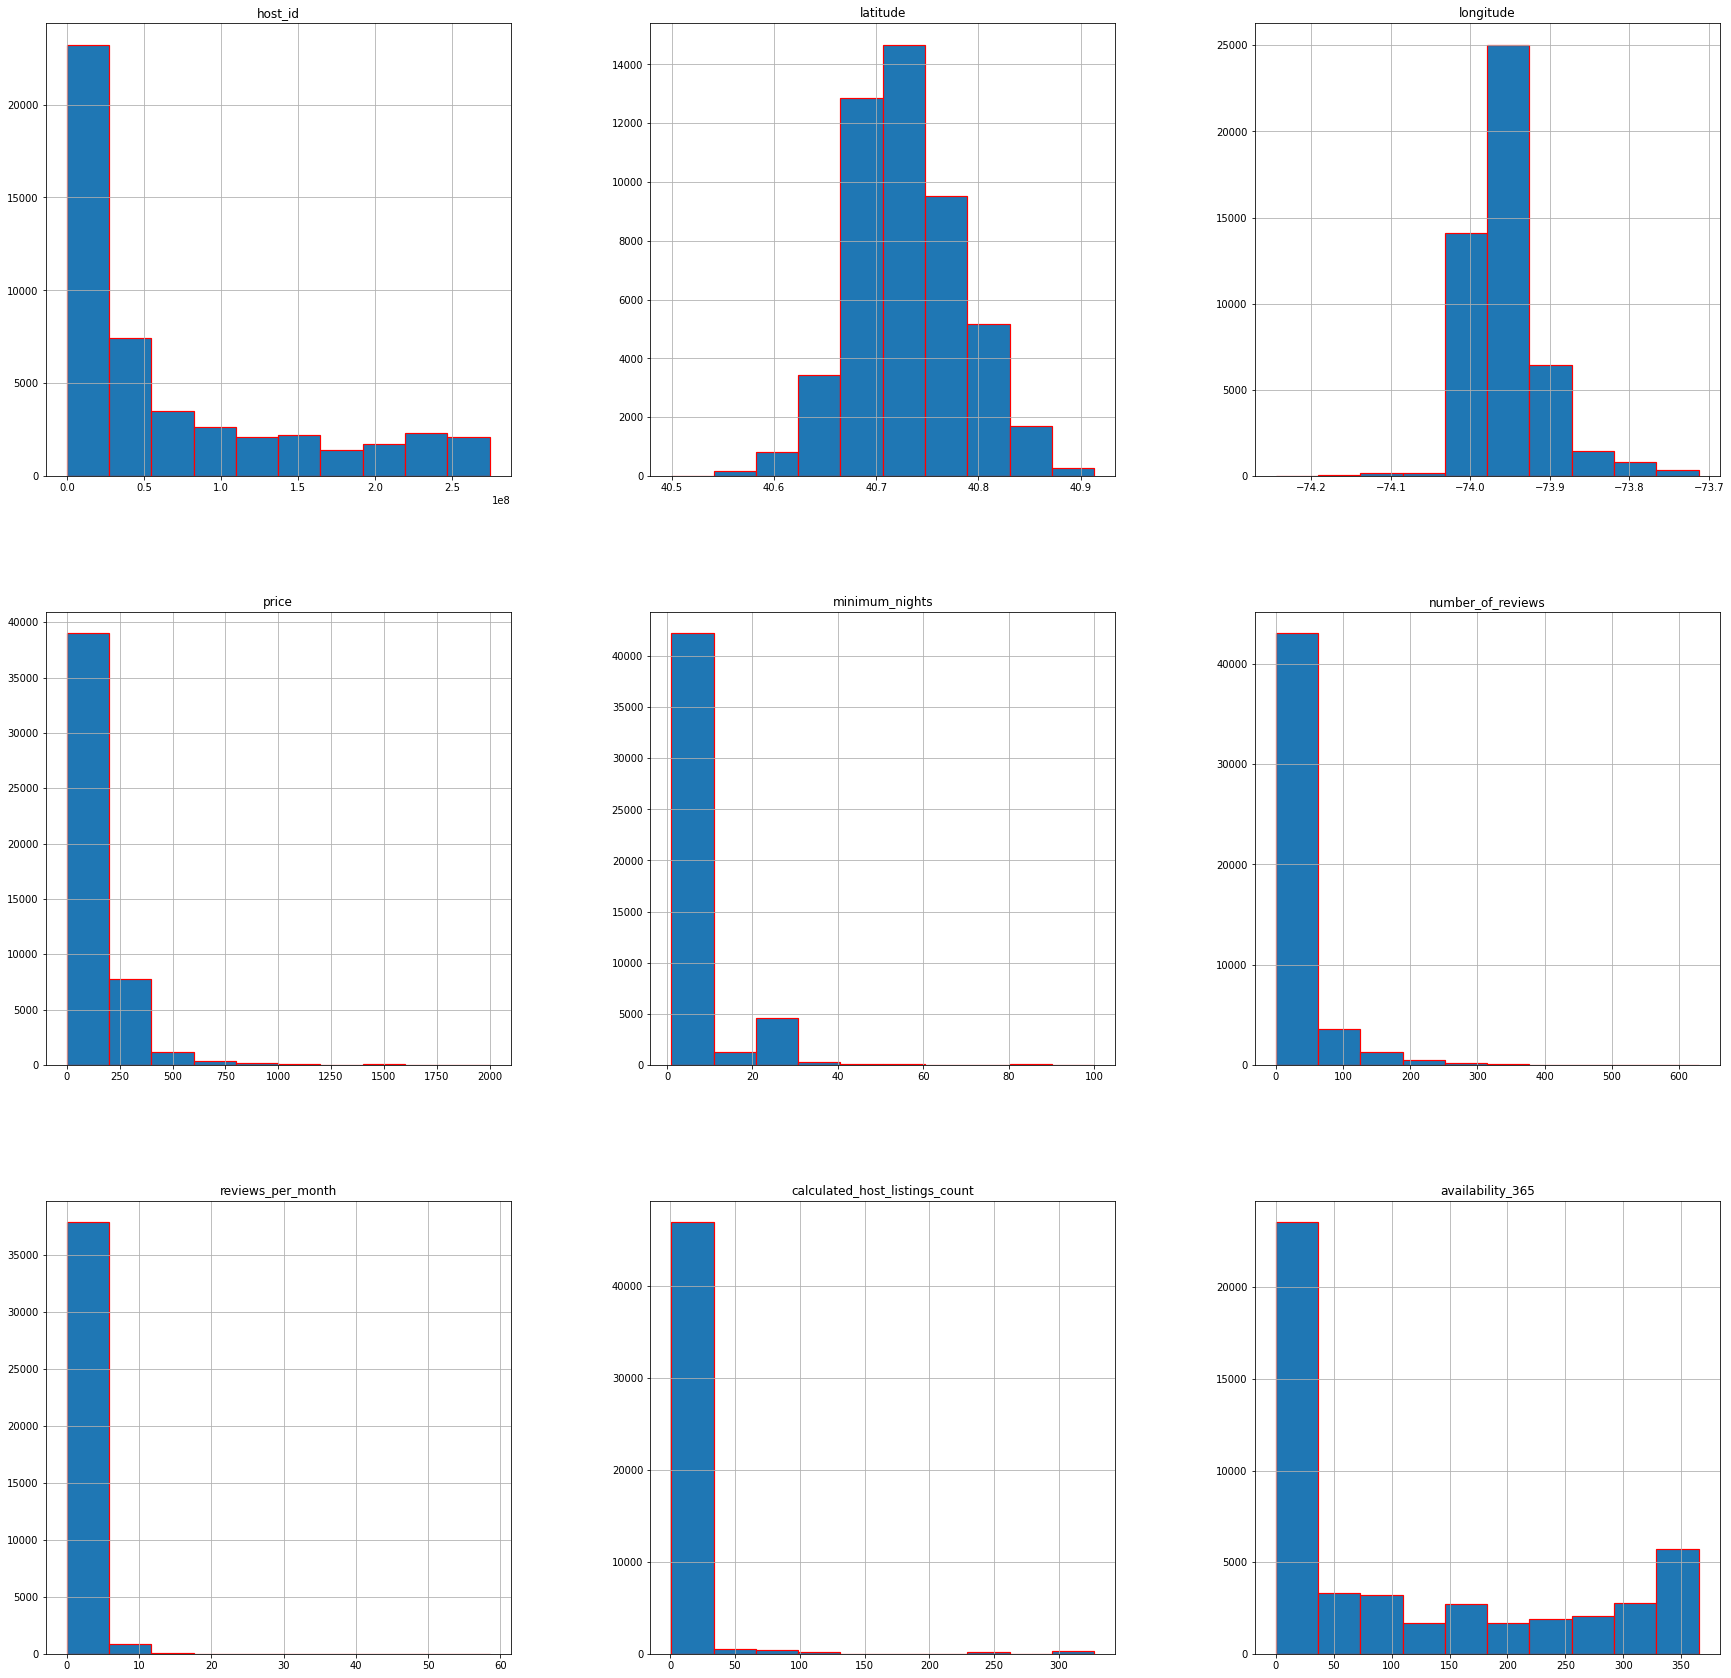

In [15]:
df_3_NY.hist(edgecolor="red", linewidth=1.2, figsize=(30, 30));

Ahora podemos comenzar a extraer distintas conclusiones que los datos arrojan. En el siguiente paso vamos a verificar cómo afecta tanto el barrio como el tipo de alojamiento al precio del alquiler. En este sentido, podemos observar que Manhattan es el barrio más caro a la hora de buscar alquiler, y que un casa entera sería el tipo de alojamiento con el precio más elevado

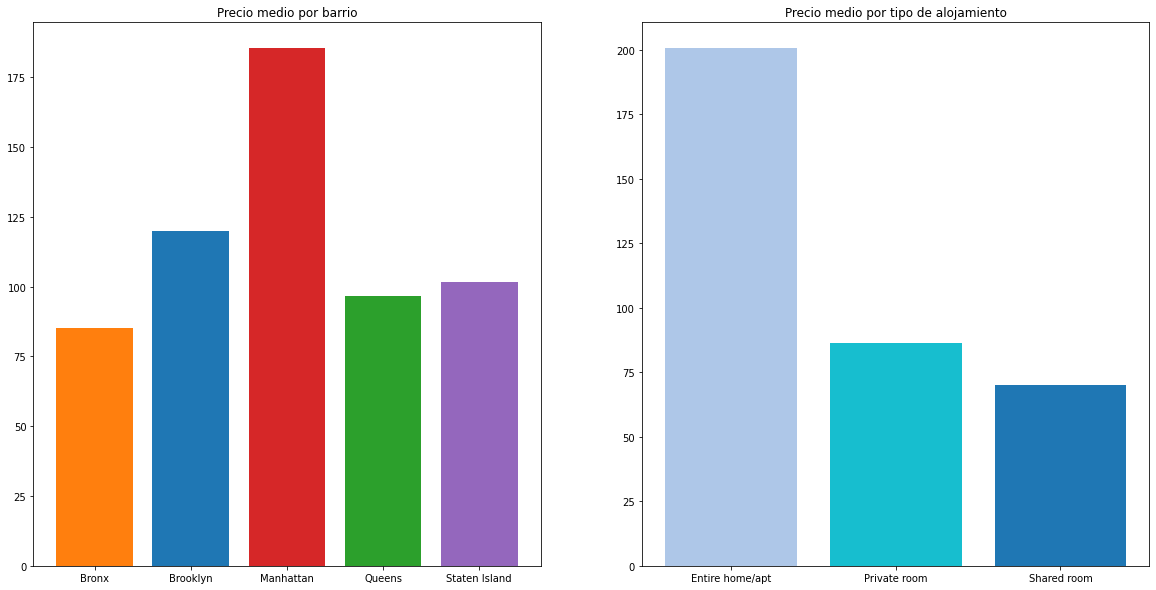

,price
neighbourhood_group,
Bronx,85.321691
Brooklyn,120.133393
Manhattan,185.491695
Queens,96.569484
Staten Island,101.684636


,price
room_type,
Entire home/apt,200.746719
Private room,86.508580
Shared room,70.123489


In [16]:
df_3_NY["neighbourhood_group"].unique()
df_3_NY["room_type"].unique()


x1 =['Bronx', 'Brooklyn', 'Manhattan','Queens', 'Staten Island']
x2 =['Entire home/apt','Private room', 'Shared room']


y1 = df_3_NY.groupby(by="neighbourhood_group").mean().price
y2 = df_3_NY.groupby(by="room_type").mean().price


width=0.8


neighbourhood_colors = [(255/255, 127/255, 14/255),(31/255, 119/255, 180/255),(214/255, 39/255, 40/255),
                        (44/255, 160/255, 44/255),(148/255, 103/255, 189/255)]


room_colors = [(174/255, 199/255, 232/255),(23/255, 190/255, 207/255),(31/255, 119/255, 180/255)]


plt.figure(figsize=(20,10))


ax1=plt.subplot(1, 2, 1)
ax2=plt.subplot(1, 2, 2)


ax1.bar(x1,y1,width, color = neighbourhood_colors)
ax1.set_title("Precio medio por barrio")


ax2.bar(x2,y2,width, color = room_colors)
ax2.set_title("Precio medio por tipo de alojamiento")


plt.show()


df_barrios = df_3_NY.groupby(["neighbourhood_group"]).agg({"price":"mean"})
df_rooms = df_3_NY.groupby(["room_type"]).agg({"price":"mean"})


display(df_barrios)
display(df_rooms)


plt.show()


Ahora vamos a ver de cada vecindario sus datos

<BarContainer object of 10 artists>

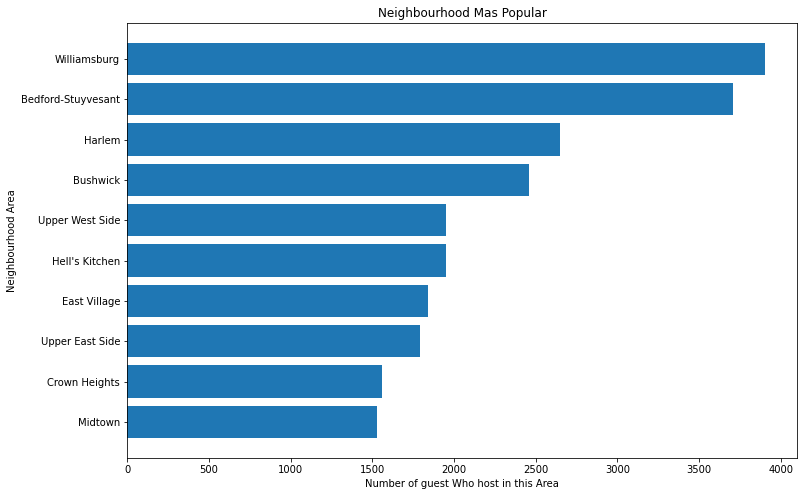

In [24]:
dato_NY = df_3_NY.neighbourhood.value_counts()[:10]
plt.figure(figsize=(12, 8))
x = list(dato_NY.index)
y = list(dato_NY.values)
x.reverse()
y.reverse()

plt.title("Neighbourhood Mas Popular")
plt.ylabel("Neighbourhood Area")
plt.xlabel("Number of guest Who host in this Area")

plt.barh(x, y)

Ahora veremos los 15 apartamentos mas populares en los diferentes Barrios de NY

219517861    327
107434423    230
30283594     120
137358866    103
16098958      96
12243051      96
61391963      91
22541573      87
200380610     64
1475015       52
7503643       52
120762452     50
2856748       49
205031545     49
190921808     47
Name: host_id, dtype: int64


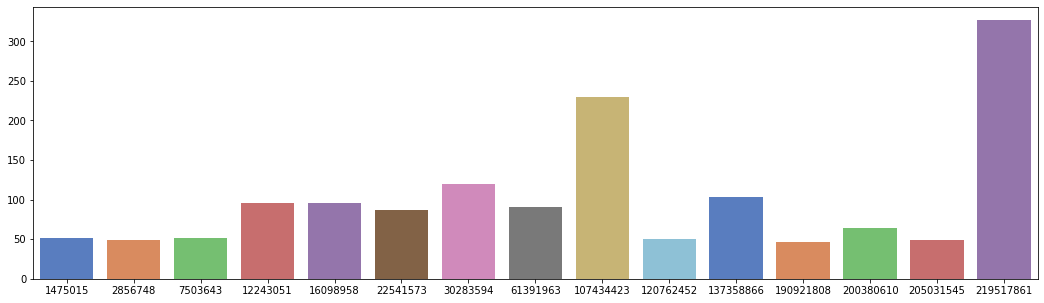

In [19]:
df_max = df_3_NY.host_id.value_counts()[:15]
print(df_max)
f,ax = plt.subplots(figsize=(18,5))
ax = sns.barplot(x = df_max.index,y=df_max.values,palette="muted")
plt.show()

A continuación, y combinando la información de los gráficos anteriores, podemos tener una idea más exacta de cómo se comporta el precio medio del alquiler aglutinando ambas variables, barrio y tipo de vivienda

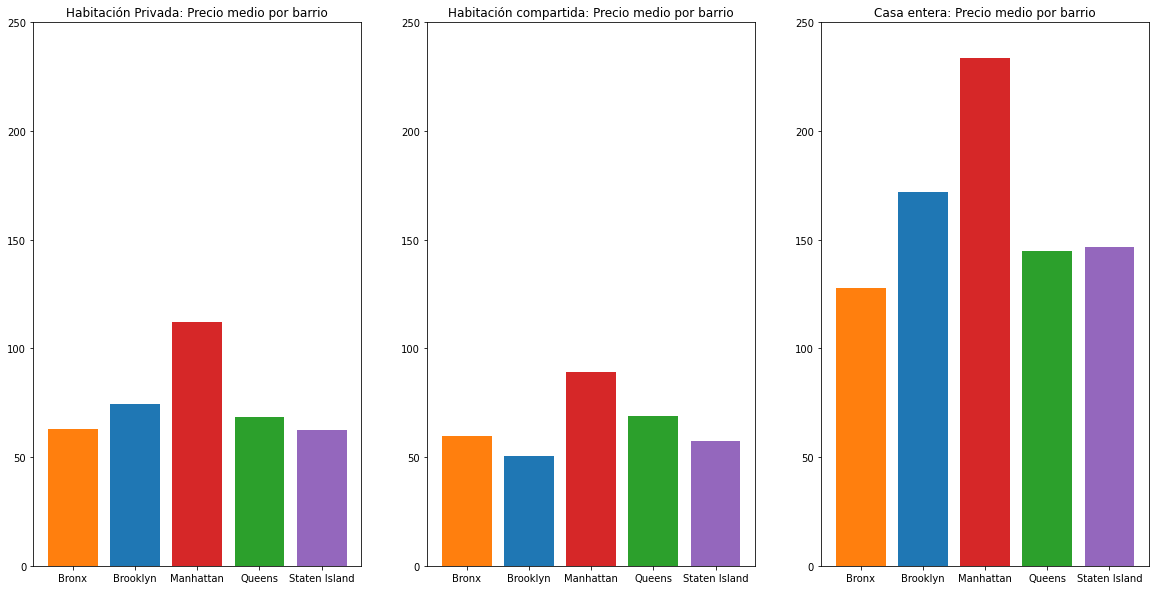

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,127.634921,63.070769,59.800000
Brooklyn,171.686402,74.483925,50.527845
Manhattan,233.666871,112.043172,89.046025
Queens,144.831579,68.240202,69.020202
Staten Island,146.534483,62.292553,57.444444


In [17]:
x=['Bronx', 'Brooklyn', 'Manhattan','Queens', 'Staten Island']


y1=df_3_NY[df_3_NY["room_type"]=="Private room"].groupby(by="neighbourhood_group").mean().price
y2=df_3_NY[df_3_NY["room_type"]=="Shared room"].groupby(by="neighbourhood_group").mean().price
y3=df_3_NY[df_3_NY["room_type"]=="Entire home/apt"].groupby(by="neighbourhood_group").mean().price




width=0.8


fig, ax = plt.subplots(figsize=(20,10))


ax1=plt.subplot(1, 3, 1)
ax2=plt.subplot(1, 3, 2)
ax3=plt.subplot(1 ,3, 3)


ax1.bar(x,y1,width, color= neighbourhood_colors)
ax1.set_title("Habitación Privada: Precio medio por barrio")
ax1.set_ylim(0,250)


ax2.bar(x,y2,width, color = neighbourhood_colors)
ax2.set_title("Habitación compartida: Precio medio por barrio")
ax2.set_ylim(0,250)


ax3.bar(x,y3,width, color = neighbourhood_colors)
ax3.set_title("Casa entera: Precio medio por barrio")
ax3.set_ylim(0,250)


plt.show()


df_n_roomtype = df_3_NY.groupby(['neighbourhood_group','room_type']).agg({'price':'mean'})
df_n_roomtype = pd.pivot_table(df_n_roomtype, values="price",index=['neighbourhood_group'], columns=['room_type'])
df_n_roomtype



Otro aspecto interesante a analizar es saber cómo se distribuye el total de los precios de los alquileres por cada uno de los barrios combinándolo con la cantidad de oferta para cada uno de ellos. A simple vista, se puede observar cómo existe una relación entre esta variable (suma de precios) y el número de alojamientos disponibles en cada uno de los barrios. La conclusión que podemos extraer de ello es que, el hecho de que ciertos barrios se vean beneficiados de mayores ingresos derivados de Airbnb, no se deriva únicamente de que los precios sean superiores si no que, además de eso, la oferta de alquileres también es mayor en ellos

,price
neighbourhood_group,
Bronx,92830
Brooklyn,2406392
Manhattan,3986773
Queens,546197
Staten Island,37725


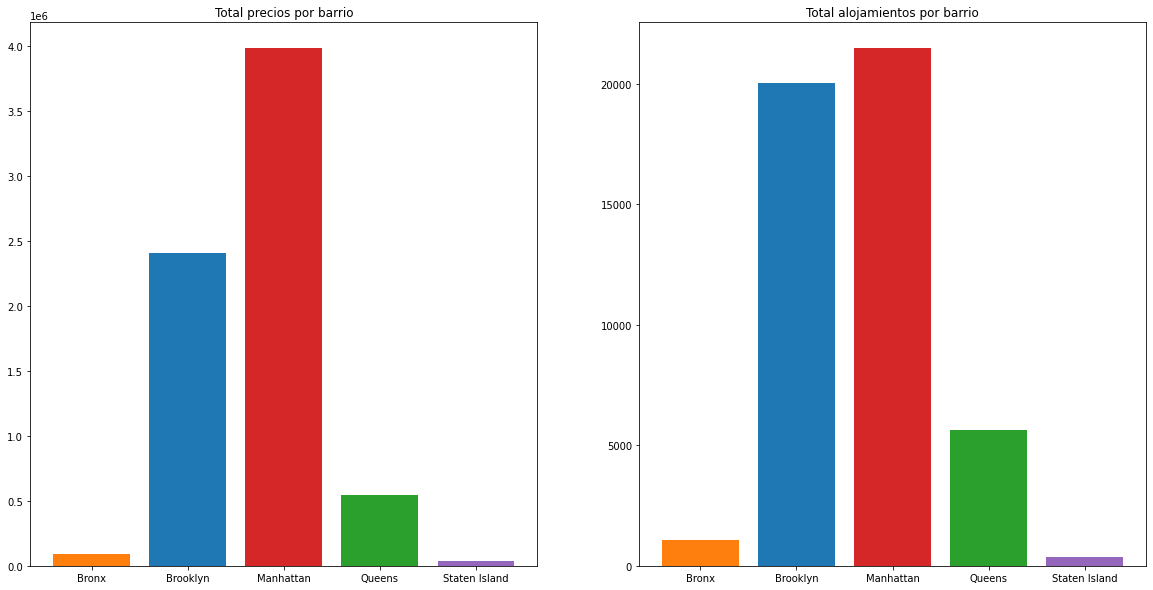

In [22]:
x =['Bronx', 'Brooklyn', 'Manhattan','Queens', 'Staten Island']
y = df_3_NY.groupby(by="neighbourhood_group").sum().price
y2 = df_3_NY.groupby(by="neighbourhood_group").count().host_id


fig, ax = plt.subplots(figsize=(20,10))


ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)


ax1.bar(x,y,width, color = neighbourhood_colors)
ax2.bar(x,y2,width, color = neighbourhood_colors)

df_sum_barrios =df_3_NY.groupby("neighbourhood_group").agg({"price":"sum"})
df_count_barrios = df_3_NY.groupby("neighbourhood_group").agg({"host_id":"count"})


display(df_sum_barrios)

ax1.set_title("Total precios por barrio")
ax2.set_title("Total alojamientos por barrio")


plt.show()

Atendiendo al análisis de las distintas dependencias entre las variables que conforman el conjunto de los datos, el siguiente mapa de calor nos permite obtener una visión del grado de correlación entre ellas. De este modo, podemos encontrar aquellas que afectan de forma directa al precio de los alquileres y, gracias a ello, establecer un primer paso para desarrollar un modelo que nos ayude a predecir un posible precio a partir de dicha variable correlacionada

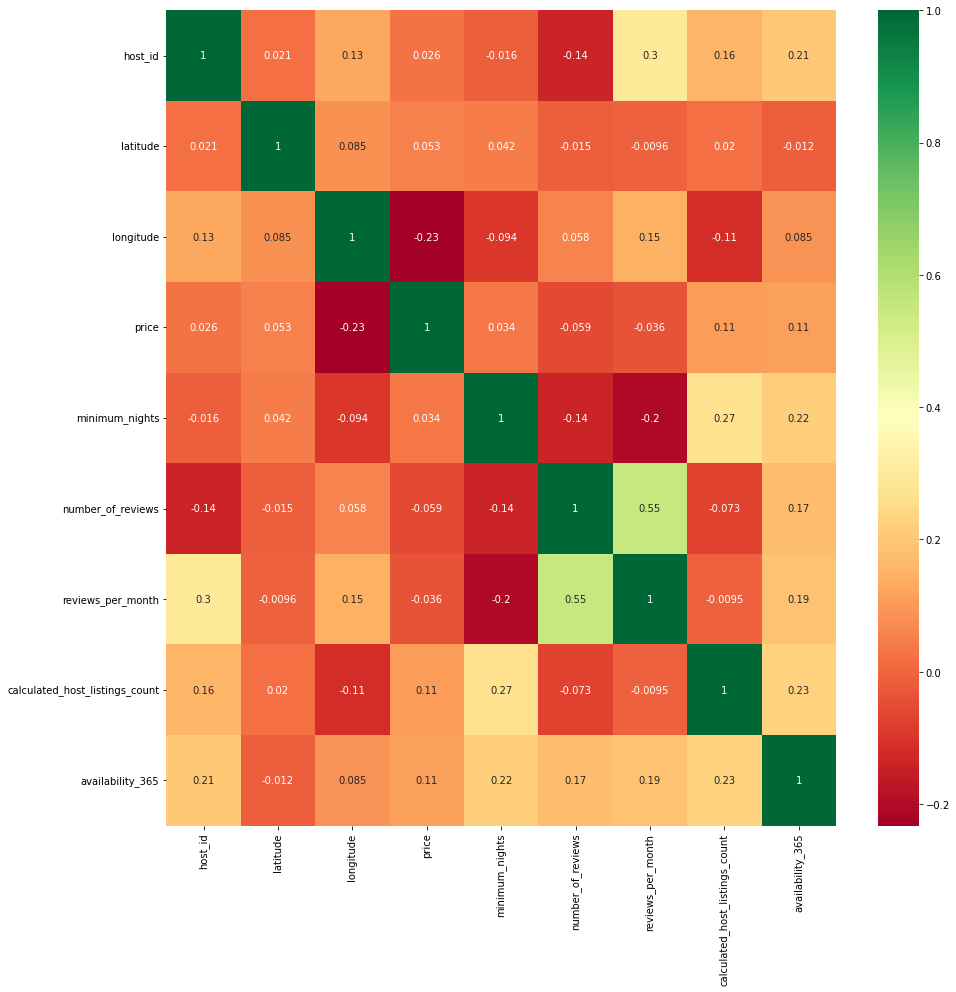

In [23]:
corrmat = df_3_NY.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (15,15))


hmap = sns.heatmap(df_3_NY[top_corr_features].corr(), annot = True, cmap="RdYlGn")

Como se puede observar en la matriz de correlación de la imagen superior, no hay ninguna variable que, de forma aislada, se correlacione lo suficientemente con el precio de los alquileres (valores cercanos a 1 o -1).¶

A continuacion vamos a ver los subbarrios o  neighbourhood , los 10 que tienen mas movimientos, una de las razones es el tema de los precios y la otra es porque tiene mas cantidad de apartamentos disponibles para el alquiler

Williamsburg          3903
Bedford-Stuyvesant    3706
Harlem                2646
Bushwick              2462
Upper West Side       1952
Hell's Kitchen        1949
East Village          1843
Upper East Side       1790
Crown Heights         1558
Midtown               1531
Name: neighbourhood, dtype: int64


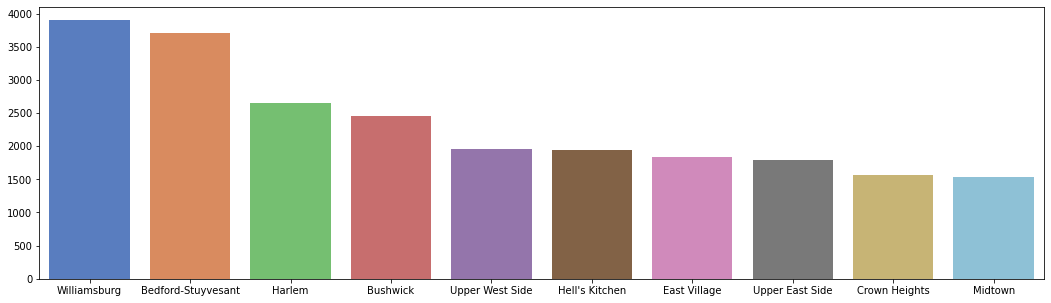

In [24]:
df_max = df_3_NY.neighbourhood.value_counts()[:10]
print(df_max)
f,ax = plt.subplots(figsize=(18,5))
ax = sns.barplot(x = df_max.index,y=df_max.values,palette="muted")
plt.show()

Para finalizar, vamos a obtener un mapa interactivo del estado de Nueva York, mediante el cual podemos tener un acceso visual a la distribución física de los alojamientos, divididos por barrios, y de este manera tener una percepción más real de cómo se distribuyen los alquileres de Airbnb a lo largo del estado. El radio de sus circunferencias se corresponde con el precio que éstos tienen

In [25]:
folium_map = folium.Map(location=[40.738, -73.98],
                        zoom_start=13,
                        tiles="OpenStreetMap")


for index, row in df_3_NY[1:2000].iterrows():
    
    
    price = row["price"]
    if row["neighbourhood_group"] == "Manhattan":
        color = "#fc0818"
    elif row["neighbourhood_group"] == "Brooklyn":
        color = "#0511f7"
    elif row["neighbourhood_group"] == "Staten Island":
        color = "#af08fc"
    elif row["neighbourhood_group"] == "Bronx":
        color = "#fc9e08"
    elif row["neighbourhood_group"] == "Queens":
        color = "#0af712"

    folium.CircleMarker(location = (row["latitude"],
                                    row["longitude"]),
                       radius = price/100,
                       color = color,
                 
                       fill = True).add_to(folium_map)  

folium_map                         

Bien con este mapa terminamos en este caso este analisis.

Ahora por último vamos a grabar el dataset que hemos transformado, dentro de la carpeta data/processed para cumplir con el punto que nos solicitaba ese tema

In [27]:
# Guardar el dato transformado de Airbnb, en nuestra carpeta /data/processed

df_3_NY.to_csv('../data/processed/clean_airbnb_2019.csv')